In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\practice\Rainfall Prediction.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(8425, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [8]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [9]:
num_cols = df.select_dtypes(exclude=[object])
cat_cols = df.select_dtypes(include=[object])
numerical = num_cols.columns
categorical = cat_cols.columns

In [10]:
num_cols.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2


In [11]:
cat_cols.head(3)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,W,W,WNW,No,No
1,02-12-2008,Albury,WNW,NNW,WSW,No,No
2,03-12-2008,Albury,WSW,W,WSW,No,No


In [12]:
num_cols.isna().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
dtype: int64

In [13]:
cat_cols.isna().sum()

Date              0
Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [14]:
places_list = df["Location"].unique().tolist()
ls = []               
def removeNull(columns):
    j=0
    while j<=len(columns)-1:
        for i in range(len(places_list)):    
            ls.append(str(df.loc[df["Location"] == places_list[i], columns[j]].median())) 

        for i in range(len(places_list)):
            df.loc[df["Location"] == places_list[i], columns[j]] = df.loc[df["Location"] == places_list[i], columns[j]].fillna(ls[i])
        j+=1
        df[columns] = df[columns].astype(float)

In [15]:
removeNull(numerical)

In [16]:
df.select_dtypes(exclude=[object]).isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

			BOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM


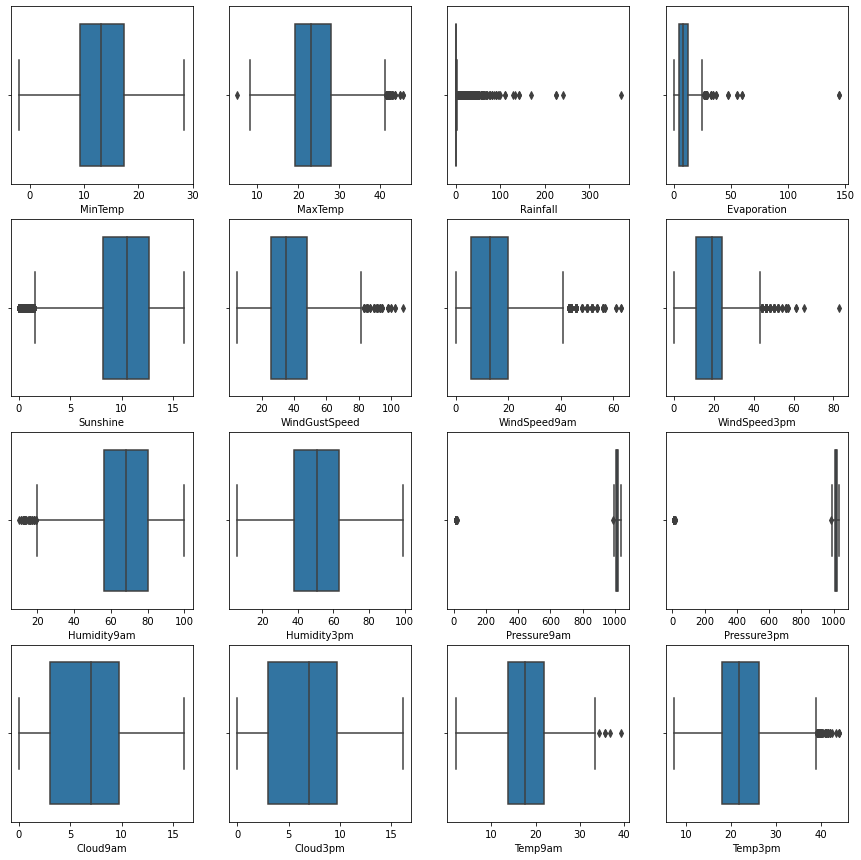

In [17]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
    
plt.show()

In [18]:
def removeOutliers(numerical):
    global df
    for i in range(len(numerical)):
        q1 = df[numerical[i]].quantile(0.25)
        q3 = df[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum  

In [19]:
removeOutliers(numerical)

			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


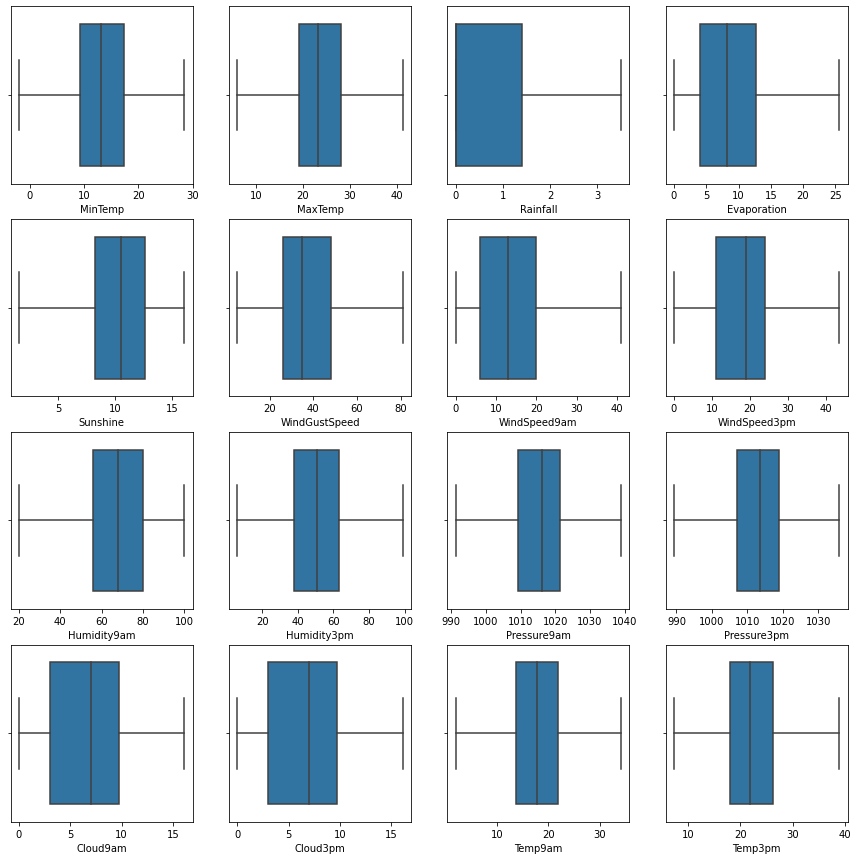

In [20]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

In [21]:
cat_cols.isna().sum()

Date              0
Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [22]:
ls_WGD = []
places_list = df["Location"].unique()
for j in range(len(places_list)):
    df_allNanWGD = df.loc[df["Location"] == places_list[j]]
    if(df_allNanWGD["WindGustDir"].isnull().all()):
        ls_WGD.append(places_list[j])

print(ls_WGD)

['Newcastle']


In [23]:
df.loc[(df.Location=='Newcastle') | (df.Location == 'Albany')].shape[0]

822

In [24]:
df.drop(df[(df.Location == 'Newcastle') | (df.Location == 'Albany')].index,inplace=True)

In [25]:
df[categorical].isna().sum()

Date              0
Location          0
WindGustDir     169
WindDir9am      411
WindDir3pm       72
RainToday       226
RainTomorrow    225
dtype: int64

In [26]:
places_list = df.Location.unique().tolist()
ls = []

def removeNull(columns):
    for j in range(len(columns)):
        ls = []
        for i in range(len(places_list)): 
            ls.append(df.loc[df["Location"] == places_list[i], columns[j]].mode()[0])
        for i in range(len(places_list)):
            df.loc[df["Location"] == places_list[i], columns[j]] = df.loc[df["Location"] == places_list[i], columns[j]].fillna(ls[i])
        df[columns] = df[columns].astype(object)

In [27]:
removeNull(categorical)

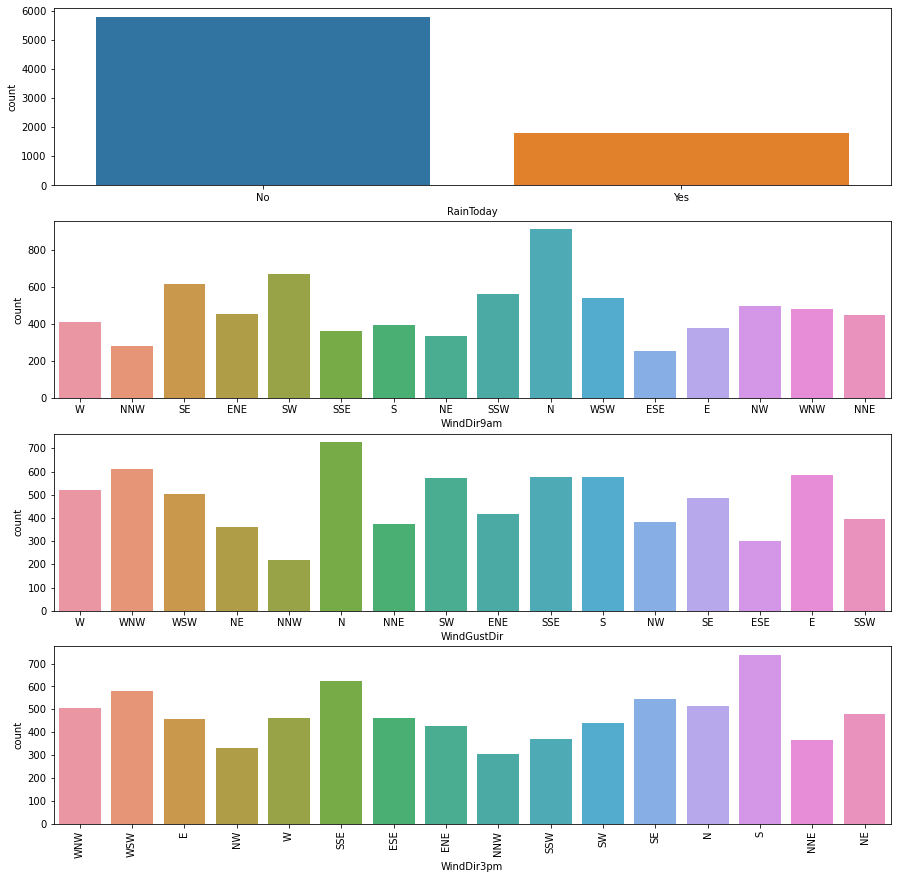

In [28]:
categoricalPlot = ['RainToday', 'WindDir9am','WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
c=0
while c<=3:
    sns.countplot(df[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.show()

In [29]:
df.Date = pd.to_datetime(df.Date)

In [30]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.drop(columns=["Date"], axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,9.7,9.7,W,44.0,W,WNW,...,1007.1,8.0,9.7,16.9,21.8,No,No,2008,1,12
1,Albury,7.4,25.1,0.0,9.7,9.7,WNW,44.0,NNW,WSW,...,1007.8,9.7,9.7,17.2,24.3,No,No,2008,2,12
2,Albury,12.9,25.7,0.0,9.7,9.7,WSW,46.0,W,WSW,...,1008.7,9.7,2.0,21.0,23.2,No,No,2008,3,12
3,Albury,9.2,28.0,0.0,9.7,9.7,NE,24.0,SE,E,...,1012.8,9.7,9.7,18.1,26.5,No,No,2008,4,12
4,Albury,17.5,32.3,1.0,9.7,9.7,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12


In [31]:
le = LabelEncoder()
df['RainTomorrow']= le.fit_transform(df['RainTomorrow'])
df.RainTomorrow.value_counts()

0    5810
1    1793
Name: RainTomorrow, dtype: int64

In [32]:
df_WindGustDir = pd.get_dummies(df["WindGustDir"], prefix="1")
df_WindDir9am = pd.get_dummies(df["WindDir9am"], prefix="2")
df_WindDir3pm = pd.get_dummies(df["WindDir3pm"], prefix="3")
df_RainToday = pd.get_dummies(df["RainToday"])
location_ohe = pd.get_dummies(df["Location"])
df_new = pd.concat([df, df_WindGustDir, df_WindDir9am, df_WindDir3pm, df_RainToday, location_ohe], axis=1)
df_new.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Location"], axis=1, inplace=True)

In [33]:
df_new["AvgTemp"] = (df_new["MinTemp"]+df_new["MaxTemp"])/2
df_new["AvgWindSpeed"] = (df_new["WindSpeed3pm"]+df_new["WindSpeed9am"])/2
df_new["AvgHumidity"] = (df_new["Humidity3pm"]+df_new["Humidity9am"])/2
df_new["AvgPressure"] = (df_new["Pressure3pm"]+df_new["Pressure9am"])/2
df_new["AvgCloud"] = (df_new["Cloud3pm"]+df_new["Cloud9am"])/2
df_new["AvgTemp"] = (df_new["Temp3pm"]+df_new["Temp9am"])/2

In [34]:
df_new.drop(columns=["MinTemp",'MaxTemp','WindSpeed3pm','WindSpeed9am','Humidity3pm','Humidity9am','Pressure3pm','Pressure9am','Cloud3pm','Cloud9am','Temp3pm','Temp9am'], axis = 1, inplace=True)

In [36]:
df_new.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainTomorrow,year,month,day,1_E,1_ENE,...,Penrith,PerthAirport,Uluru,Williamtown,Wollongong,AvgTemp,AvgWindSpeed,AvgHumidity,AvgPressure,AvgCloud
0,0.6,9.7,9.7,44.0,0,2008,1,12,0,0,...,0,0,0,0,0,19.35,22.0,46.5,1007.40,8.85
1,0.0,9.7,9.7,44.0,0,2008,2,12,0,0,...,0,0,0,0,0,20.75,13.0,34.5,1009.20,9.70
2,0.0,9.7,9.7,46.0,0,2008,3,12,0,0,...,0,0,0,0,0,22.10,22.5,34.0,1008.15,5.85
3,0.0,9.7,9.7,24.0,0,2008,4,12,0,0,...,0,0,0,0,0,22.30,10.0,30.5,1015.20,9.70
4,1.0,9.7,9.7,41.0,0,2008,5,12,0,0,...,0,0,0,0,0,23.75,13.5,57.5,1008.40,7.50


In [37]:
X = df_new.loc[:,df_new.columns != "RainTomorrow"]
y = df_new.loc[:,["RainTomorrow"]]

In [38]:
y.RainTomorrow.value_counts()

0    5810
1    1793
Name: RainTomorrow, dtype: int64

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6082, 73)
(1521, 73)
(6082, 1)
(1521, 1)


In [40]:
scaler = StandardScaler()

scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

In [41]:
n_components=50
pca = PCA(n_components=n_components)
pca.fit(XtrainSTD)
XtrainPCA = pca.transform(XtrainSTD)
XtestPCA = pca.transform(XtestSTD)
XtrainPCA.shape

(6082, 50)

In [42]:
pca.explained_variance_ratio_

array([0.05242514, 0.04709183, 0.03907461, 0.03423731, 0.03000597,
       0.02898242, 0.02819141, 0.02630889, 0.02470417, 0.02125141,
       0.02017297, 0.01941273, 0.01854995, 0.01802924, 0.01748268,
       0.01694215, 0.01682808, 0.01625484, 0.01621448, 0.01595881,
       0.01577791, 0.0156066 , 0.01536967, 0.01503592, 0.01495353,
       0.01473596, 0.01461023, 0.01451398, 0.01436093, 0.01419863,
       0.01396987, 0.01394192, 0.01386844, 0.0136972 , 0.01346492,
       0.01322944, 0.01314143, 0.01305069, 0.01287127, 0.01262184,
       0.0124607 , 0.01228012, 0.01211731, 0.01182416, 0.01132618,
       0.01126664, 0.01109645, 0.01082989, 0.01028309, 0.01015638])

<AxesSubplot:xlabel='PC', ylabel='var'>

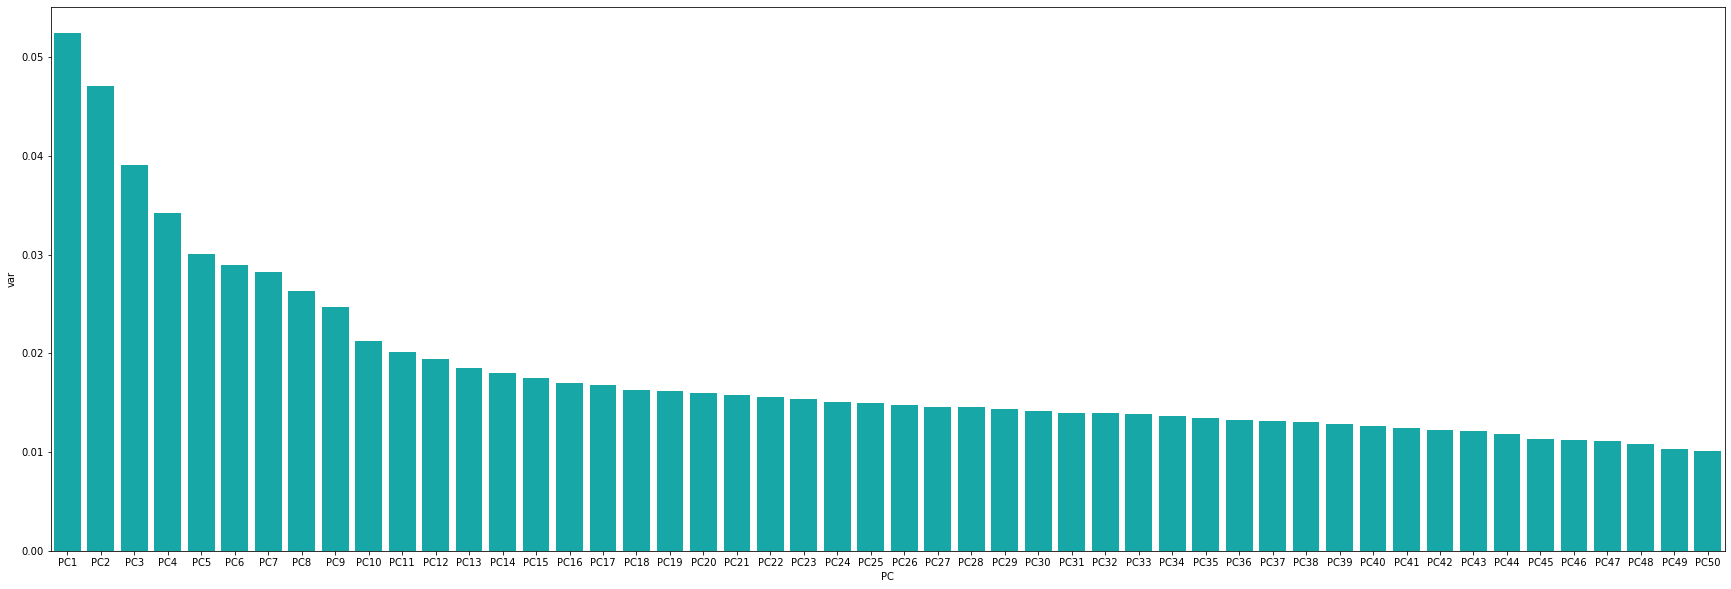

In [43]:
PC = []
for i in range(1,n_components+1):
    PC.append('PC'+str(i))
    
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,10))
sns.barplot(x='PC',y="var", data=pca_df, color="c")

In [44]:
lr = LogisticRegression(random_state=0)
parameters = {'penalty': ['l1', 'l2'],
              'fit_intercept':[True, False]
             }
grid_search = GridSearchCV(estimator=lr, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=10, n_jobs=-1)
grid_search = grid_search.fit(XtrainSTD, ytrain.values.ravel())

In [45]:
print("Best Parameters : ",grid_search.best_params_)
print("Best AUC-ROC : ", grid_search.best_score_)

Best Parameters :  {'fit_intercept': True, 'penalty': 'l2'}
Best AUC-ROC :  0.8476494270091794


In [46]:
lr = LogisticRegression(fit_intercept=True, penalty='l2', random_state=0)
lr.fit(XtrainSTD, ytrain)
predict = lr.predict(XtestSTD)
accuracy = accuracy_score(predict, ytest)
roc_score = roc_auc_score(predict, ytest)
print(accuracy)

0.819197896120973


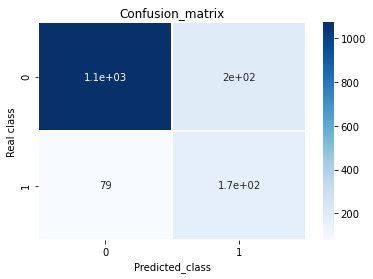

In [47]:
cnf_matrix = confusion_matrix(predict, ytest)
sns.heatmap(cnf_matrix,cmap="Blues",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

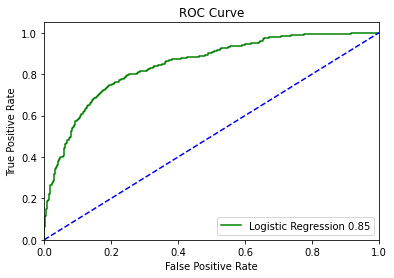

In [48]:
def plot_curve(model, X_test, y_test,score, model_label):
    
    # function to plot roc curve for the given model
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='green', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
plot_curve(lr, XtestSTD, ytest, grid_search.best_score_, "Logistic Regression")

Q2

In [55]:
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [49]:
dataset=num_cols

In [59]:
removeNull(numerical)

In [60]:
dataset.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [61]:
dataset.shape

(8425, 16)

In [70]:
dataset.fillna(value=df.mean(), inplace=True)

In [71]:
dataset.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [72]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193565,23.859943,2.750517,6.376358,8.610589,40.096731,13.854621,18.540851,67.817610,51.242809,1017.378124,1014.975903,5.252069,5.187807,17.762218,22.442835
std,5.379489,6.114516,10.314384,4.025019,3.007535,13.777746,10.128842,9.704966,16.774331,18.312003,6.305448,6.246897,2.658262,2.535204,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,8.400000,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.222458,23.300000,0.000000,7.757037,9.696021,39.513580,13.000000,19.000000,68.000000,51.000000,1016.100000,1013.600000,6.951953,6.852657,17.792628,22.000000
75%,17.300000,28.000000,0.861278,7.757037,9.696021,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


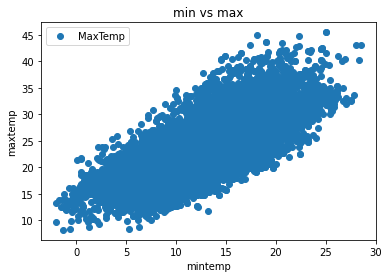

In [73]:
dataset.plot(x='MinTemp', y='MaxTemp' , style='o')
plt.title('min vs max')
plt.xlabel('mintemp')
plt.ylabel('maxtemp')
plt.show()

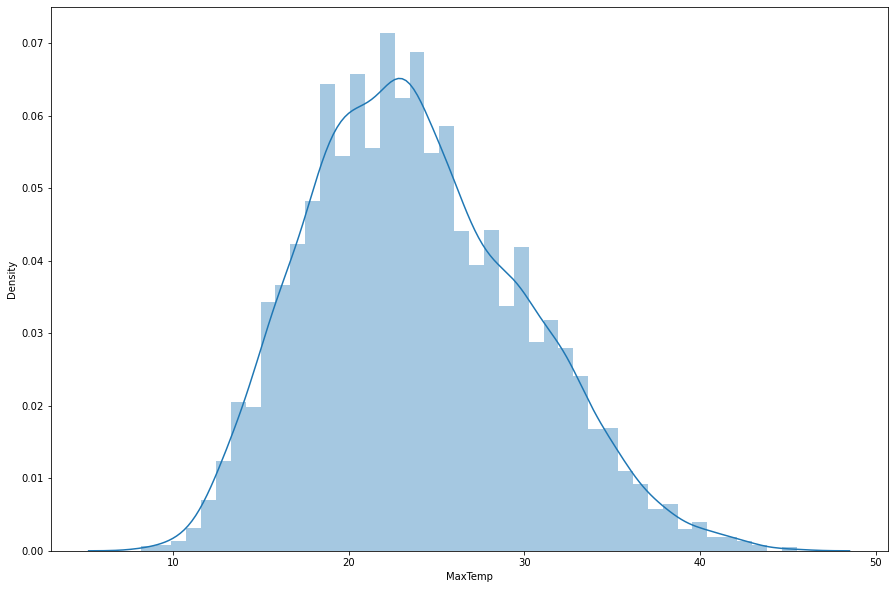

In [74]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['MaxTemp'])
plt.show()

In [75]:
X= dataset['MinTemp'].values.reshape(-1,1)
y= dataset['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [76]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
print('Intercept is :',model.intercept_)

Intercept is : [13.17579067]


In [78]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[0.81129661]]


In [79]:
y_pred= model.predict(X_test)

In [80]:
df=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

      Actual  Predicted
0       30.5  30.050760
1       17.0  16.826625
2       21.7  20.396331
3       36.1  27.373481
4       19.8  25.669759
...      ...        ...
1680    21.2  21.694405
1681    28.4  27.616870
1682    21.4  23.884906
1683    21.2  24.858462
1684    25.6  21.532146

[1685 rows x 2 columns]


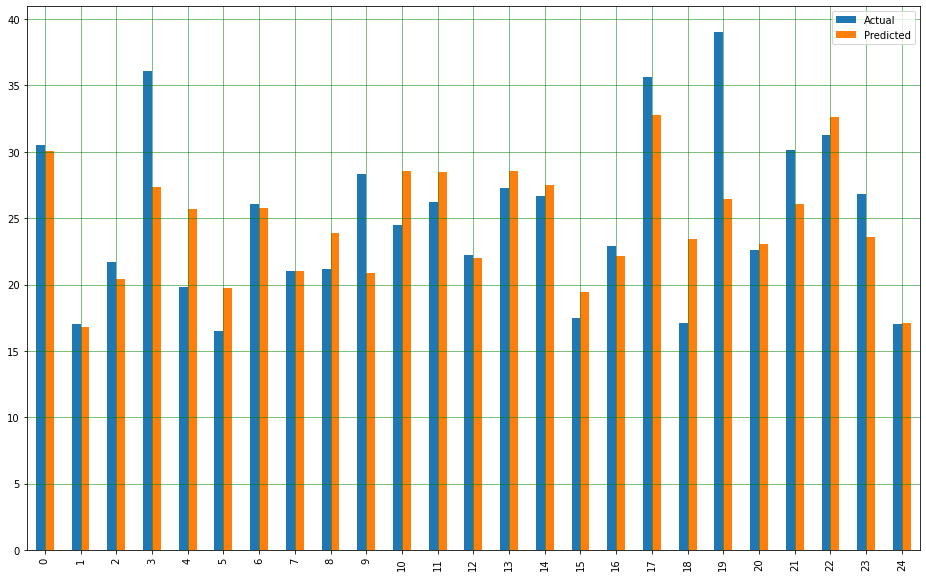

In [81]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

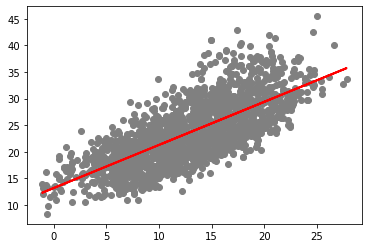

In [82]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [83]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error is:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean abolute error is: 3.3568689559726237
Mean squared error is: 17.356178747276214
Root mean squared error is: 4.1660747409613545
